In [1]:
# File 4: Insights and Trading Strategy Recommendations

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
# Load cleaned data
print("Loading data for final analysis...")

sentiment_df = pd.read_csv('cleaned_sentiment.csv')
merged_df = pd.read_csv('cleaned_merged_trades.csv')
daily_stats = pd.read_csv('daily_trader_stats.csv')
trader_stats = pd.read_csv('trader_performance_summary.csv')

sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])
merged_df['trade_date'] = pd.to_datetime(merged_df['trade_date'])
daily_stats['date'] = pd.to_datetime(daily_stats['date'])

merged_with_sentiment = merged_df[merged_df['sentiment_category'].notna()].copy()

print("Data loaded successfully")

Loading data for final analysis...
Data loaded successfully


In [5]:
# Key findings summary
print("\n" + "="*80)
print("KEY FINDINGS SUMMARY")
print("="*80)

findings = []
# Finding 1: Overall sentiment distribution
sentiment_counts = sentiment_df['sentiment_category'].value_counts()
most_common_sentiment = sentiment_counts.index[0]
findings.append(f"1. Market Sentiment Distribution: '{most_common_sentiment}' is the most common sentiment ({sentiment_counts.iloc[0]} days, {sentiment_counts.iloc[0]/len(sentiment_df)*100:.1f}%)")

# Finding 2: Overall trading performance
total_pnl = merged_df[merged_df['is_closed']]['Closed_PnL'].sum()
total_trades = len(merged_df)
closed_trades = merged_df['is_closed'].sum()
overall_win_rate = (merged_df['is_profitable'].sum() / closed_trades * 100)
findings.append(f"2. Overall Performance: {total_trades:,} trades executed, {closed_trades:,} closed, Total PnL: ${total_pnl:,.2f}, Win Rate: {overall_win_rate:.2f}%")

# Finding 3: Best performing sentiment
sentiment_performance = merged_with_sentiment.groupby('sentiment_category').agg({
    'Closed_PnL': 'mean',
    'is_profitable': 'sum',
    'is_closed': 'sum'
})
sentiment_performance['win_rate'] = (sentiment_performance['is_profitable'] / sentiment_performance['is_closed'] * 100)
best_sentiment = sentiment_performance['Closed_PnL'].idxmax()
best_sentiment_pnl = sentiment_performance.loc[best_sentiment, 'Closed_PnL']
findings.append(f"3. Best Sentiment for Trading: '{best_sentiment}' with average PnL of ${best_sentiment_pnl:.2f}")

# Finding 4: Worst performing sentiment
worst_sentiment = sentiment_performance['Closed_PnL'].idxmin()
worst_sentiment_pnl = sentiment_performance.loc[worst_sentiment, 'Closed_PnL']
findings.append(f"4. Worst Sentiment for Trading: '{worst_sentiment}' with average PnL of ${worst_sentiment_pnl:.2f}")

# Finding 5: Fear vs Greed performance
fear_trades = merged_with_sentiment[merged_with_sentiment['is_fear'] == True]
greed_trades = merged_with_sentiment[merged_with_sentiment['is_greed'] == True]
fear_avg_pnl = fear_trades[fear_trades['is_closed']]['Closed_PnL'].mean()
greed_avg_pnl = greed_trades[greed_trades['is_closed']]['Closed_PnL'].mean()
if fear_avg_pnl > greed_avg_pnl:
    findings.append(f"5. Fear vs Greed: Trading during FEAR periods is more profitable (Fear: ${fear_avg_pnl:.2f} vs Greed: ${greed_avg_pnl:.2f})")
else:
    findings.append(f"5. Fear vs Greed: Trading during GREED periods is more profitable (Greed: ${greed_avg_pnl:.2f} vs Fear: ${fear_avg_pnl:.2f})")

# Finding 6: Top performing trader
top_trader = trader_stats.iloc[0]
findings.append(f"6. Top Trader: Account {top_trader['Account'][:10]}... with Net PnL: ${top_trader['net_pnl']:,.2f}, Win Rate: {top_trader['win_rate']:.2f}%")

# Finding 7: Position direction performance
long_trades = merged_with_sentiment[merged_with_sentiment['is_long'] == True]
short_trades = merged_with_sentiment[merged_with_sentiment['is_long'] == False]
long_avg_pnl = long_trades[long_trades['is_closed']]['Closed_PnL'].mean()
short_avg_pnl = short_trades[short_trades['is_closed']]['Closed_PnL'].mean()
if long_avg_pnl > short_avg_pnl:
    findings.append(f"7. Position Direction: LONG positions are more profitable (Long: ${long_avg_pnl:.2f} vs Short: ${short_avg_pnl:.2f})")
else:
    findings.append(f"7. Position Direction: SHORT positions are more profitable (Short: ${short_avg_pnl:.2f} vs Long: ${long_avg_pnl:.2f})")

# Finding 8: Most traded coins
top_coins = merged_df['Coin'].value_counts().head(3)
coin_strings = [f'{coin} ({count:,} trades)' for coin, count in top_coins.items()]
findings.append(f"8. Most Traded Assets: {', '.join(coin_strings)}")

# Finding 9: Trading volume by sentiment
fear_volume = fear_trades['Size_USD'].sum()
greed_volume = greed_trades['Size_USD'].sum()
findings.append(f"9. Trading Volume: Fear periods: ${fear_volume:,.2f}, Greed periods: ${greed_volume:,.2f}")

# Finding 10: Best time to trade
hourly_performance = merged_with_sentiment.groupby('hour')['Closed_PnL'].mean().sort_values(ascending=False)
best_hour = hourly_performance.index[0]
best_hour_pnl = hourly_performance.iloc[0]
findings.append(f"10. Best Trading Hour: Hour {best_hour} with average PnL of ${best_hour_pnl:.2f}")

print("\n")
for finding in findings:
    print(finding)


KEY FINDINGS SUMMARY


1. Market Sentiment Distribution: 'Fear' is the most common sentiment (781 days, 29.5%)
2. Overall Performance: 211,224 trades executed, 104,408 closed, Total PnL: $10,296,958.94, Win Rate: 83.20%
3. Best Sentiment for Trading: 'Extreme Greed' with average PnL of $67.89
4. Worst Sentiment for Trading: 'Neutral' with average PnL of $34.31
5. Fear vs Greed: Trading during GREED periods is more profitable (Greed: $105.70 vs Fear: $101.86)
6. Top Trader: Account 0xb1231a4a... with Net PnL: $2,127,387.28, Win Rate: 79.10%
7. Position Direction: SHORT positions are more profitable (Short: $118.95 vs Long: $74.56)
8. Most Traded Assets: HYPE (68,005 trades), @107 (29,992 trades), BTC (26,064 trades)
9. Trading Volume: Fear periods: $597,809,051.23, Greed periods: $413,047,659.29
10. Best Trading Hour: Hour 12 with average PnL of $131.17


In [6]:
# Trading strategy recommendations
print("\n" + "="*80)
print("TRADING STRATEGY RECOMMENDATIONS")
print("="*80)

strategies = []

# Strategy 1: Sentiment-based entry
if fear_avg_pnl > greed_avg_pnl:
    strategies.append({
        'Strategy': 'Counter-trend Trading',
        'Description': 'Enter positions during extreme fear periods when others are panicking',
        'Rationale': f'Fear periods show {((fear_avg_pnl - greed_avg_pnl) / abs(greed_avg_pnl) * 100):.1f}% better average returns',
        'Implementation': 'Increase position sizes when fear_greed_value < 40'
    })
else:
    strategies.append({
        'Strategy': 'Trend Following',
        'Description': 'Follow the momentum during greed periods',
        'Rationale': f'Greed periods show {((greed_avg_pnl - fear_avg_pnl) / abs(fear_avg_pnl) * 100):.1f}% better average returns',
        'Implementation': 'Increase position sizes when fear_greed_value > 60'
    })

# Strategy 2: Position direction by sentiment
long_fear = long_trades[long_trades['is_fear'] == True]['Closed_PnL'].mean()
long_greed = long_trades[long_trades['is_greed'] == True]['Closed_PnL'].mean()
short_fear = short_trades[short_trades['is_fear'] == True]['Closed_PnL'].mean()
short_greed = short_trades[short_trades['is_greed'] == True]['Closed_PnL'].mean()

if long_fear > short_fear:
    strategies.append({
        'Strategy': 'Buy the Dip',
        'Description': 'Go long during fear periods',
        'Rationale': f'Long positions during fear yield ${long_fear:.2f} average PnL',
        'Implementation': 'Open long positions when sentiment shows Fear or Extreme Fear'
    })
else:
    strategies.append({
        'Strategy': 'Short on Fear',
        'Description': 'Short positions during fear can be profitable',
        'Rationale': f'Short positions during fear yield ${short_fear:.2f} average PnL',
        'Implementation': 'Consider shorting when sentiment reaches extreme fear'
    })

# Strategy 3: Time-based trading
best_hours = hourly_performance.head(3).index.tolist()
strategies.append({
    'Strategy': 'Optimal Time Window',
    'Description': f'Focus trading activity during hours: {", ".join(map(str, best_hours))}',
    'Rationale': f'These hours show consistently higher average PnL',
    'Implementation': f'Concentrate 60-70% of daily trades during these {len(best_hours)} hours'
})

# Strategy 4: Risk management by sentiment
fear_volatility = fear_trades[fear_trades['is_closed']]['Closed_PnL'].std()
greed_volatility = greed_trades[greed_trades['is_closed']]['Closed_PnL'].std()
strategies.append({
    'Strategy': 'Volatility-Adjusted Position Sizing',
    'Description': 'Adjust position sizes based on sentiment volatility',
    'Rationale': f'Fear volatility: ${fear_volatility:.2f}, Greed volatility: ${greed_volatility:.2f}',
    'Implementation': 'Reduce position sizes by 30-40% during higher volatility periods'
})

# Strategy 5: Win rate optimization
high_wr_sentiment = sentiment_performance['win_rate'].idxmax()
high_wr_value = sentiment_performance.loc[high_wr_sentiment, 'win_rate']
strategies.append({
    'Strategy': 'High Probability Trading',
    'Description': f'Focus on {high_wr_sentiment} periods for higher win rates',
    'Rationale': f'{high_wr_sentiment} shows {high_wr_value:.1f}% win rate',
    'Implementation': f'Increase trade frequency during {high_wr_sentiment} periods'
})

strategy_df = pd.DataFrame(strategies)
print("\n")
for idx, strategy in strategy_df.iterrows():
    print(f"\nStrategy {idx+1}: {strategy['Strategy']}")
    print(f"   Description: {strategy['Description']}")
    print(f"   Rationale: {strategy['Rationale']}")
    print(f"   Implementation: {strategy['Implementation']}")


TRADING STRATEGY RECOMMENDATIONS



Strategy 1: Trend Following
   Description: Follow the momentum during greed periods
   Rationale: Greed periods show 3.8% better average returns
   Implementation: Increase position sizes when fear_greed_value > 60

Strategy 2: Short on Fear
   Description: Short positions during fear can be profitable
   Rationale: Short positions during fear yield $61.62 average PnL
   Implementation: Consider shorting when sentiment reaches extreme fear

Strategy 3: Optimal Time Window
   Description: Focus trading activity during hours: 12, 7, 11
   Rationale: These hours show consistently higher average PnL
   Implementation: Concentrate 60-70% of daily trades during these 3 hours

Strategy 4: Volatility-Adjusted Position Sizing
   Description: Adjust position sizes based on sentiment volatility
   Rationale: Fear volatility: $1423.70, Greed volatility: $1366.35
   Implementation: Reduce position sizes by 30-40% during higher volatility periods

Strategy 5: Hi

In [7]:
# Risk assessment
print("\n" + "="*80)
print("RISK ASSESSMENT")
print("="*80)

closed_only = merged_df[merged_df['is_closed']]

risk_metrics = {
    'Total Profitable Trades': merged_df['is_profitable'].sum(),
    'Total Loss Trades': merged_df['is_loss'].sum(),
    'Overall Win Rate (%)': overall_win_rate,
    'Average Win ($)': closed_only[closed_only['is_profitable']]['Closed_PnL'].mean(),
    'Average Loss ($)': closed_only[closed_only['is_loss']]['Closed_PnL'].mean(),
    'Largest Win ($)': closed_only['Closed_PnL'].max(),
    'Largest Loss ($)': closed_only['Closed_PnL'].min(),
    'Profit Factor': abs(closed_only[closed_only['is_profitable']]['Closed_PnL'].sum() / 
                        closed_only[closed_only['is_loss']]['Closed_PnL'].sum()),
    'Risk-Reward Ratio': abs(closed_only[closed_only['is_profitable']]['Closed_PnL'].mean() / 
                             closed_only[closed_only['is_loss']]['Closed_PnL'].mean())
}

risk_df = pd.DataFrame(list(risk_metrics.items()), columns=['Metric', 'Value'])
print("\n")
print(risk_df.to_string(index=False))



RISK ASSESSMENT


                 Metric          Value
Total Profitable Trades   86869.000000
      Total Loss Trades   17539.000000
   Overall Win Rate (%)      83.201479
        Average Win ($)     152.479548
       Average Loss ($)    -168.127426
        Largest Win ($)  135329.090100
       Largest Loss ($) -117990.104100
          Profit Factor       4.491930
      Risk-Reward Ratio       0.906928



GENERATING EXECUTIVE DASHBOARD


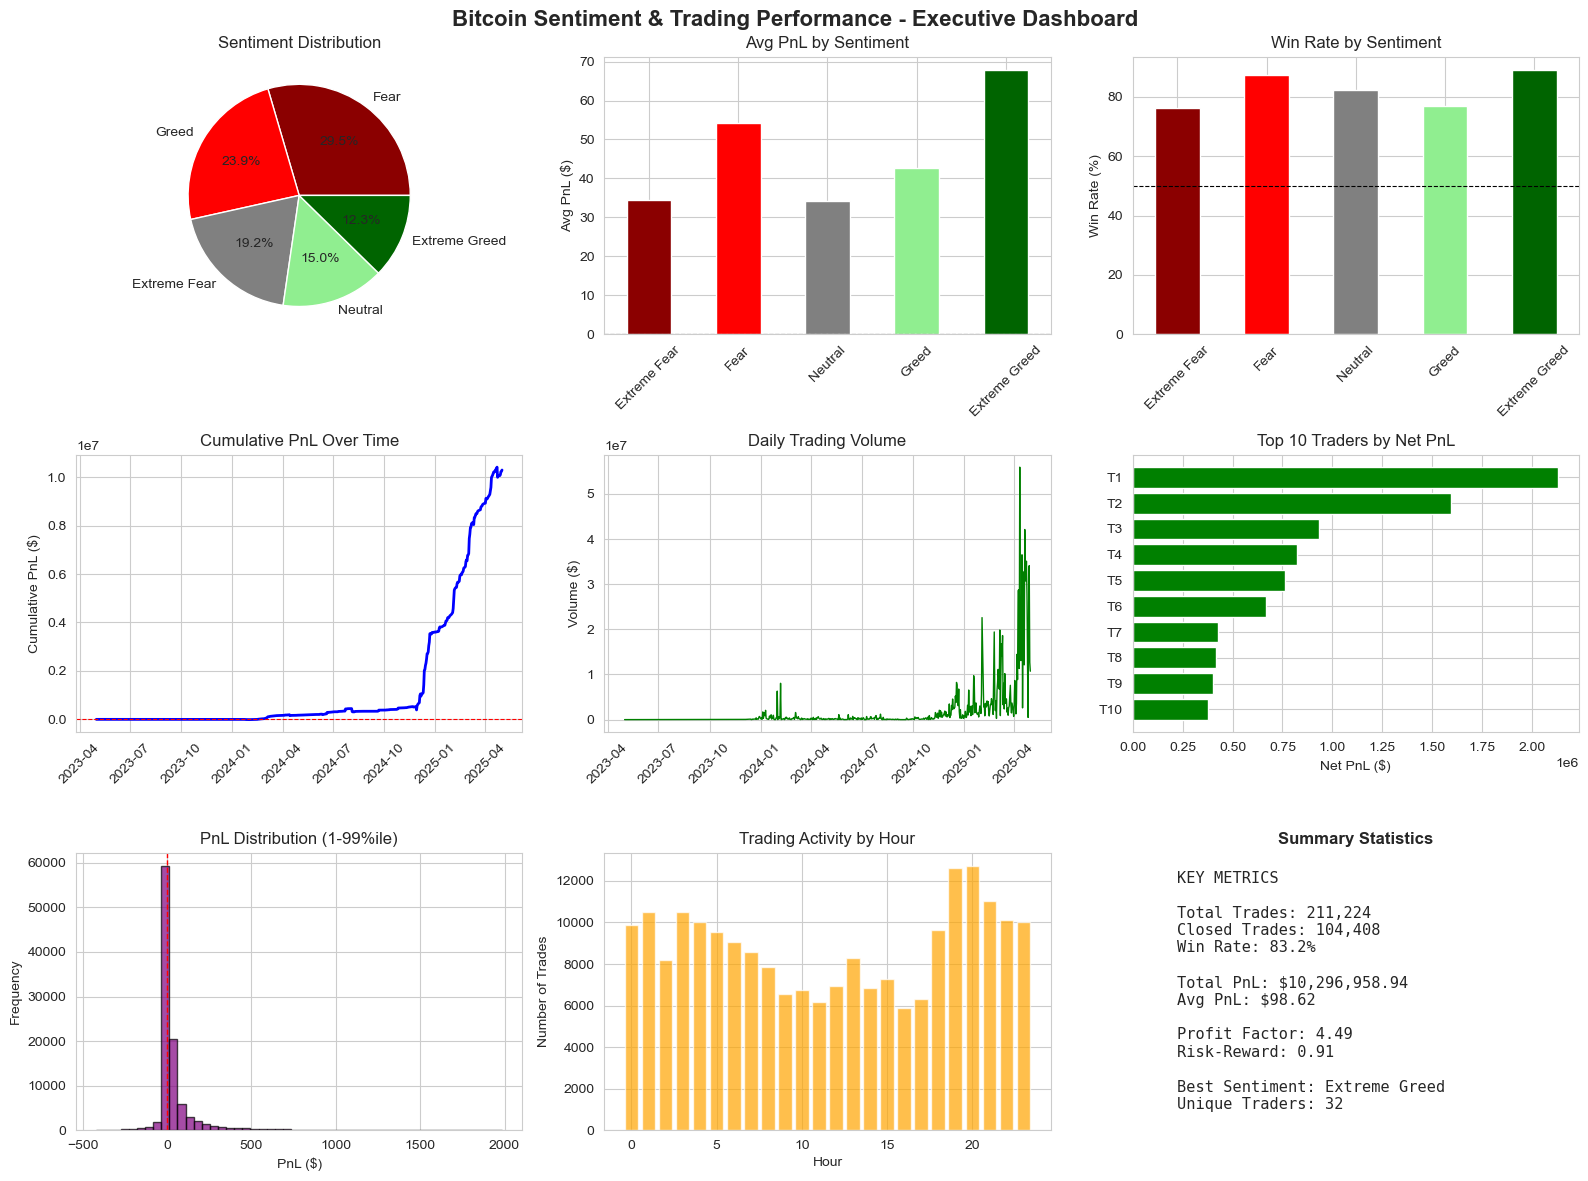

In [8]:
# Executive dashboard visualization
print("\n" + "="*80)
print("GENERATING EXECUTIVE DASHBOARD")
print("="*80)

fig = plt.figure(figsize=(16, 12))

# Dashboard title
fig.suptitle('Bitcoin Sentiment & Trading Performance - Executive Dashboard', 
             fontsize=16, fontweight='bold', y=0.98)

# Sentiment distribution pie chart
ax1 = plt.subplot(3, 3, 1)
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', ax=ax1, 
                     colors=['darkred', 'red', 'gray', 'lightgreen', 'darkgreen'])
ax1.set_title('Sentiment Distribution')
ax1.set_ylabel('')

# Performance by sentiment
ax2 = plt.subplot(3, 3, 2)
sentiment_order = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']
perf_data = sentiment_performance.reindex(sentiment_order)
perf_data['Closed_PnL'].plot(kind='bar', ax=ax2, 
                             color=['darkred', 'red', 'gray', 'lightgreen', 'darkgreen'])
ax2.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
ax2.set_title('Avg PnL by Sentiment')
ax2.set_xlabel('')
ax2.set_ylabel('Avg PnL ($)')
ax2.tick_params(axis='x', rotation=45)

# Win rate by sentiment
ax3 = plt.subplot(3, 3, 3)
perf_data['win_rate'].plot(kind='bar', ax=ax3, 
                           color=['darkred', 'red', 'gray', 'lightgreen', 'darkgreen'])
ax3.axhline(y=50, color='black', linestyle='--', linewidth=0.8)
ax3.set_title('Win Rate by Sentiment')
ax3.set_xlabel('')
ax3.set_ylabel('Win Rate (%)')
ax3.tick_params(axis='x', rotation=45)

# Cumulative PnL over time
ax4 = plt.subplot(3, 3, 4)
daily_pnl = merged_df.groupby('trade_date')['Closed_PnL'].sum().cumsum()
ax4.plot(daily_pnl.index, daily_pnl.values, linewidth=2, color='blue')
ax4.axhline(y=0, color='red', linestyle='--', linewidth=0.8)
ax4.set_title('Cumulative PnL Over Time')
ax4.set_xlabel('')
ax4.set_ylabel('Cumulative PnL ($)')
ax4.tick_params(axis='x', rotation=45)

# Trading volume over time
ax5 = plt.subplot(3, 3, 5)
daily_volume = merged_df.groupby('trade_date')['Size_USD'].sum()
ax5.plot(daily_volume.index, daily_volume.values, linewidth=1, color='green')
ax5.set_title('Daily Trading Volume')
ax5.set_xlabel('')
ax5.set_ylabel('Volume ($)')
ax5.tick_params(axis='x', rotation=45)

# Top 10 traders
ax6 = plt.subplot(3, 3, 6)
top_10 = trader_stats.head(10)
ax6.barh(range(len(top_10)), top_10['net_pnl'], color='green')
ax6.set_yticks(range(len(top_10)))
ax6.set_yticklabels([f"T{i+1}" for i in range(len(top_10))])
ax6.set_title('Top 10 Traders by Net PnL')
ax6.set_xlabel('Net PnL ($)')
ax6.invert_yaxis()

# PnL distribution
ax7 = plt.subplot(3, 3, 7)
pnl_data = closed_only['Closed_PnL']
pnl_filtered = pnl_data[pnl_data.between(pnl_data.quantile(0.01), pnl_data.quantile(0.99))]
ax7.hist(pnl_filtered, bins=50, alpha=0.7, color='purple', edgecolor='black')
ax7.axvline(x=0, color='red', linestyle='--', linewidth=1)
ax7.set_title('PnL Distribution (1-99%ile)')
ax7.set_xlabel('PnL ($)')
ax7.set_ylabel('Frequency')

# Hourly trading activity
ax8 = plt.subplot(3, 3, 8)
hourly_trades = merged_df.groupby('hour').size()
ax8.bar(hourly_trades.index, hourly_trades.values, alpha=0.7, color='orange')
ax8.set_title('Trading Activity by Hour')
ax8.set_xlabel('Hour')
ax8.set_ylabel('Number of Trades')

# Key metrics summary
ax9 = plt.subplot(3, 3, 9)
ax9.axis('off')
metrics_text = f"""
KEY METRICS

Total Trades: {total_trades:,}
Closed Trades: {closed_trades:,}
Win Rate: {overall_win_rate:.1f}%

Total PnL: ${total_pnl:,.2f}
Avg PnL: ${closed_only['Closed_PnL'].mean():.2f}

Profit Factor: {risk_metrics['Profit Factor']:.2f}
Risk-Reward: {risk_metrics['Risk-Reward Ratio']:.2f}

Best Sentiment: {best_sentiment}
Unique Traders: {trader_stats.shape[0]}
"""
ax9.text(0.1, 0.5, metrics_text, fontsize=11, family='monospace',
         verticalalignment='center')
ax9.set_title('Summary Statistics', fontweight='bold')

plt.tight_layout()
plt.savefig('executive_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

In [9]:
# Export final report
print("\n" + "="*80)
print("EXPORTING FINAL REPORT")
print("="*80)

report_data = {
    'findings': findings,
    'strategies': strategies,
    'risk_metrics': risk_metrics
}

with open('final_report.txt', 'w') as f:
    f.write("="*80 + "\n")
    f.write("BITCOIN SENTIMENT & TRADER PERFORMANCE ANALYSIS - FINAL REPORT\n")
    f.write("="*80 + "\n\n")
    
    f.write("KEY FINDINGS:\n")
    f.write("-"*80 + "\n")
    for finding in findings:
        f.write(finding + "\n")
    
    f.write("\n" + "="*80 + "\n")
    f.write("TRADING STRATEGIES:\n")
    f.write("-"*80 + "\n")
    for idx, strategy in enumerate(strategies, 1):
        f.write(f"\nStrategy {idx}: {strategy['Strategy']}\n")
        f.write(f"Description: {strategy['Description']}\n")
        f.write(f"Rationale: {strategy['Rationale']}\n")
        f.write(f"Implementation: {strategy['Implementation']}\n")
    
    f.write("\n" + "="*80 + "\n")
    f.write("RISK METRICS:\n")
    f.write("-"*80 + "\n")
    for metric, value in risk_metrics.items():
        f.write(f"{metric}: {value}\n")

print("Final report exported to: final_report.txt")
print("\nAnalysis complete!")
print("\nGenerated files:")
print("- executive_dashboard.png")
print("- final_report.txt")


EXPORTING FINAL REPORT
Final report exported to: final_report.txt

Analysis complete!

Generated files:
- executive_dashboard.png
- final_report.txt
